# Testing

In [ ]:
#from keras.models import load_model
#model = load_model('./assets')
model.load_weights('./model.h5')

test_preds = model.predict(x_test)
print(test_preds.shape)
print(type(test_preds))

In [ ]:
print(type(test_preds))
print(test_preds.shape)
print(test_preds.dtype)
#print(test_preds[0])
imshow(test_preds[0])


In [ ]:
from skimage.io import imshow_collection
imshow_collection(test_preds)
imshow_collection(y_test)

# Evaluating Individual Dice-Co efficient
# Metrics for individual evaluation

In [ ]:
def dice_coef2(a, b):
          #  hi = K.hi
          #  hi = hi / 255
    
          #    hi = tf.convert_to_tensor(hi, dtype=None)
          #    pred = tf.convert_to_tensor(test_preds, dtype=None)
    hi = a/255
    pred = b
    hi = K.flatten(hi)
    pred = K.flatten(pred)
    upper_part = 2 * K.sum((hi * pred))
    lower_part = K.sum(hi + pred)
    dice = upper_part / lower_part
    return dice

def jaccard_index2(a, b):
    hi = a/255
    pred = b
    hi = K.flatten(hi)
    pred = K.flatten(pred)
    numerator = K.sum(hi * pred)
    denominator = K.sum((hi + pred) - (hi * pred))
    iou = numerator / denominator
    return iou

In [ ]:
print(y_test[0].dtype)
print(test_preds[0].dtype)
i = y_test[0]
j = test_preds[0]
#i = np.asarray(i).astype(dtype=np.float32)
result = dice_coef2(i,j)
#print(tf.get_static_value(result))
print('Dice Co-efficient: ', result)
result2 = jaccard_index2(i,j)
print('Jaccard-index: ', result2)
x = np.zeros((2, row, columns, 3))
x[0] = i
x[1] = j
imshow_collection(x)

* Dice Co-efficient:  tf.Tensor(0.23927042, shape=(), dtype=float32)
* Jaccard-index:  tf.Tensor(0.13589278, shape=(), dtype=float32)
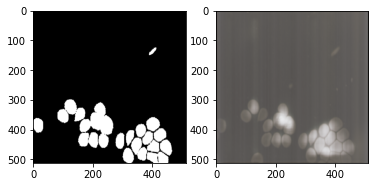

In [ ]:
print(y_test[1].dtype)
print(test_preds[1].dtype)
i = y_test[1]
j = test_preds[1]
#i = np.asarray(i).astype(dtype=np.float32)
result = dice_coef2(i,j)
#print(tf.get_static_value(result))
print('Dice Co-efficient: ', result)
result2 = jaccard_index2(i,j)
print('Jaccard-index: ', result2)
x = np.zeros((2, row, columns, 3))
x[0] = i
x[1] = j
imshow_collection(x)

* Dice Co-efficient:  tf.Tensor(0.89160377, shape=(), dtype=float32)
* Jaccard-index:  tf.Tensor(0.80440885, shape=(), dtype=float32)
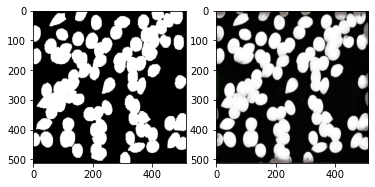

In [ ]:
print(y_test[2].dtype)
print(test_preds[2].dtype)
i = y_test[2]
j = test_preds[2]
#i = np.asarray(i).astype(dtype=np.float32)
result = dice_coef2(i,j)
#print(tf.get_static_value(result))
print('Dice Co-efficient: ', result)
result2 = jaccard_index2(i,j)
print('Jaccard-index: ', result2)
x = np.zeros((2, row, columns, 3))
x[0] = i
x[1] = j
imshow_collection(x)

* Dice Co-efficient:  tf.Tensor(0.8918109, shape=(), dtype=float32)
* Jaccard-index:  tf.Tensor(0.80474627, shape=(), dtype=float32)
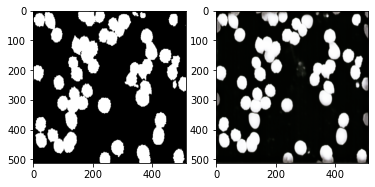

In [ ]:
print(y_test[3].dtype)
print(test_preds[3].dtype)
i = y_test[3]
j = test_preds[3]
#i = np.asarray(i).astype(dtype=np.float32)
result = dice_coef2(i,j)
#print(tf.get_static_value(result))
print('Dice Co-efficient: ', result)
result2 = jaccard_index2(i,j)
print('Jaccard-index: ', result2)
x = np.zeros((2, row, columns, 3))
x[0] = i
x[1] = j
imshow_collection(x)

* Dice Co-efficient:  tf.Tensor(0.87021285, shape=(), dtype=float32)
* Jaccard-index:  tf.Tensor(0.7702451, shape=(), dtype=float32)
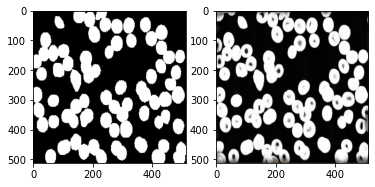

In [ ]:
print(y_test[4].dtype)
print(test_preds[4].dtype)
i = y_test[4]
j = test_preds[4]
#i = np.asarray(i).astype(dtype=np.float32)
result = dice_coef2(i,j)
#print(tf.get_static_value(result))
print('Dice Co-efficient: ', result)
result2 = jaccard_index2(i,j)
print('Jaccard-index: ', result2)
x = np.zeros((2, row, columns, 3))
x[0] = i
x[1] = j
imshow_collection(x)

* Dice Co-efficient:  tf.Tensor(0.8343879, shape=(), dtype=float32)
* Jaccard-index:  tf.Tensor(0.7158367, shape=(), dtype=float32)
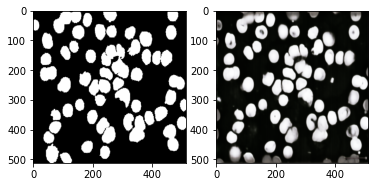

# Average Test Dice Co-efficient, Jaccard index

In [ ]:
#dice_list = np.array(len(test_preds))
#jaccard_list = np.array(len(test_preds))
avg_dice = 0
avg_jaccard = 0
for x in range(len(test_preds)):
    i = y_test[x]
    j = test_preds[x]
    avg_dice = avg_dice + tf.get_static_value(dice_coef2(i,j))
    avg_jaccard = avg_jaccard + tf.get_static_value(jaccard_index2(i,j))
    
#print(dice_list.dtype)
#print(type(dice_list))
#print(dice_list)
#print(jaccard_list)
#avg_dice = tf.get_static_value(K.sum(dice_list)) / tf.get_static_value(tf.size(dice_list))
#avg_jaccard = tf.get_static_value(K.sum(jaccard_list)) / tf.get_static_value(tf.size(jaccard_list))
print('Average Test Dice co-efficent: ', avg_dice/len(test_preds))
print('Average Test Jaccrad Index: ', avg_jaccard/len(test_preds))
    

* Average Test Dice co-efficent:  0.7454571664333344
* Average Test Jaccrad Index:  0.6462259352207184

In [ ]:
history

# Highest & Lowest

In [ ]:
print('Lowest training loss: ', min(history.history['loss']))
print('Lowest validation loss: ', min(history.history['val_loss']))
print('Highest training dice coefficient: ', max(history.history['dice_coef']))
print('Highest validation dice coefficient: ', max(history.history['val_dice_coef']))
print('Highest training jaccrad index: ', max(history.history['jaccard_index']))
print('Highest validation jaccard index: ', max(history.history['val_jaccard_index']))

* Lowest training loss:  0.09442712366580963
* Lowest validation loss:  0.4349963068962097
* Highest training dice coefficient:  0.9052702188491821
* Highest validation dice coefficient:  0.6950398087501526
* Highest training jaccrad index:  0.8279275894165039
* Highest validation jaccard index:  0.5846233367919922